# Weather Prediction Model Using Machine Learning

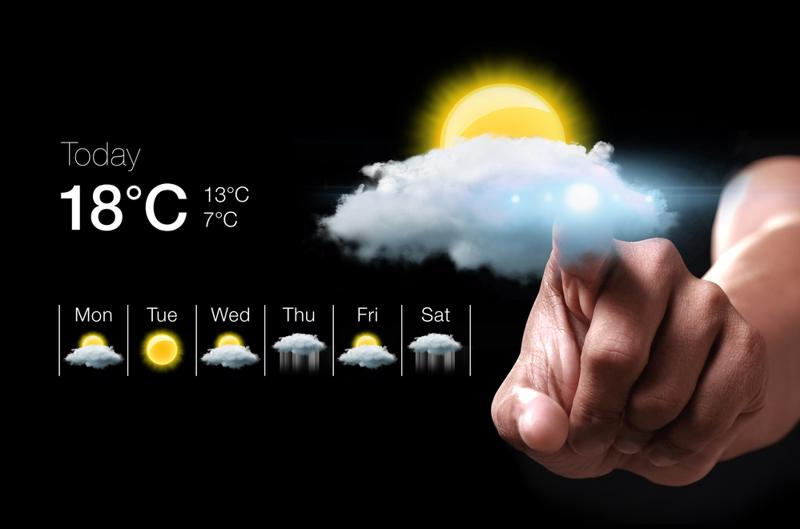

In [36]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import scipy
import re
import missingno as mso
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load the data
weather=pd.read_excel("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\Excel file\\weather.xlsx")
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
#to see the last five rows
weather.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [4]:
# shape of dataset
weather.shape

(1461, 6)

In [5]:
# information about dataset
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [6]:
#Describe of dataset
weather.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
# find ot null value in dataset
weather.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
# index of dataset
weather.index

RangeIndex(start=0, stop=1461, step=1)

In [9]:
 # Dtypes of dataset
weather.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

# Visualization

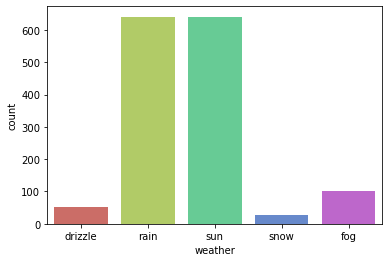

In [10]:
# Countplot
import warnings
warnings.filterwarnings('ignore')
sns.countplot("weather",data=weather,palette='hls')
plt.show()

In [11]:
# Counting the persentage ofb rain ,sun ,snow,drizzle,fog
countrain=len(weather[weather.weather=='rain'])
countfog=len(weather[weather.weather=='fog'])
countsun=len(weather[weather.weather=='sun'])
countdrizzle=len(weather[weather.weather=='drizzle'])
countsnow=len(weather[weather.weather=='snow'])
print('Persentage of rain:{:2f}%'.format((countrain/(len(weather.weather))*100)))
print('Persentage of fog:{:2f}%'.format((countfog/(len(weather.weather))*100)))
print('Persentage of sun:{:2f}%'.format((countsun/(len(weather.weather))*100)))
print('Persentage of drizzle:{:2f}%'.format((countdrizzle/(len(weather.weather))*100)))
print('Persentage of snow:{:2f}%'.format((countsnow/(len(weather.weather))*100)))

Persentage of rain:43.874059%
Persentage of fog:6.913073%
Persentage of sun:43.805613%
Persentage of drizzle:3.627652%
Persentage of snow:1.779603%


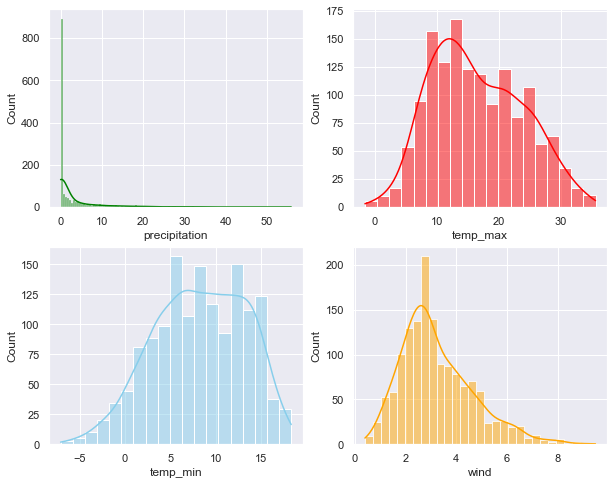

In [12]:
# Histogram
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=weather,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=weather,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=weather,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=weather,x="wind",kde=True,ax=axs[1,1],color='orange')
plt.show()

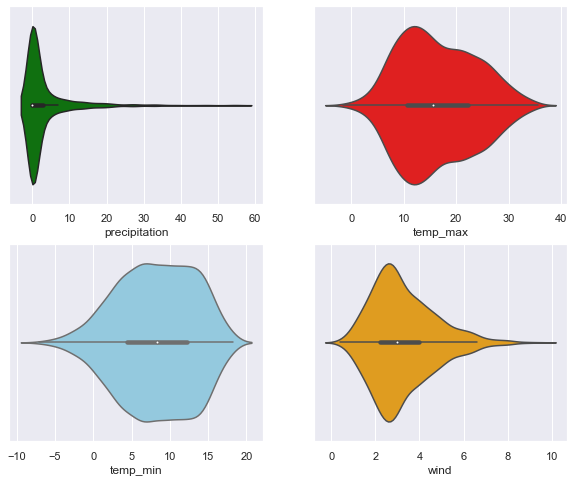

In [13]:
# VIOLIN PLOT
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=weather,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=weather,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=weather,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=weather,x="wind",kde=True,ax=axs[1,1],color='orange')
plt.show()

### BOXPLOT

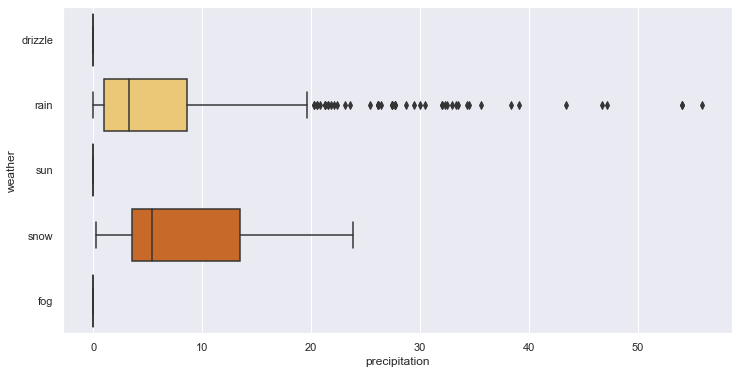

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot("precipitation","weather",data=weather,palette="YlOrBr")
plt.show()

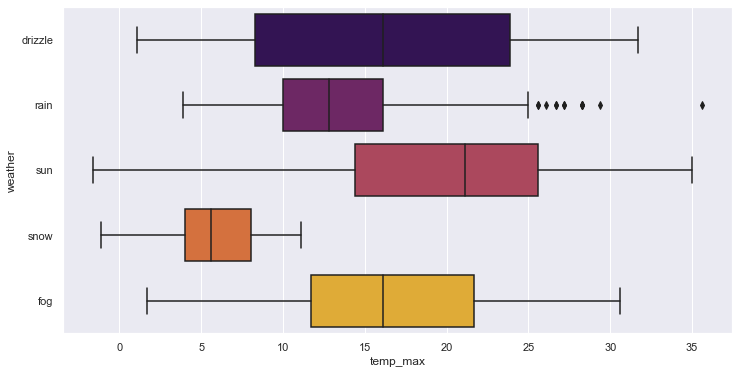

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot("temp_max","weather",data=weather,palette="inferno")
plt.show()

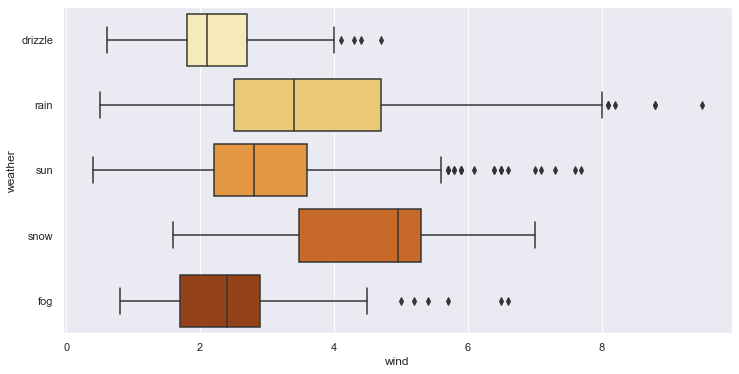

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot("wind","weather",data=weather,palette="YlOrBr")
plt.show()

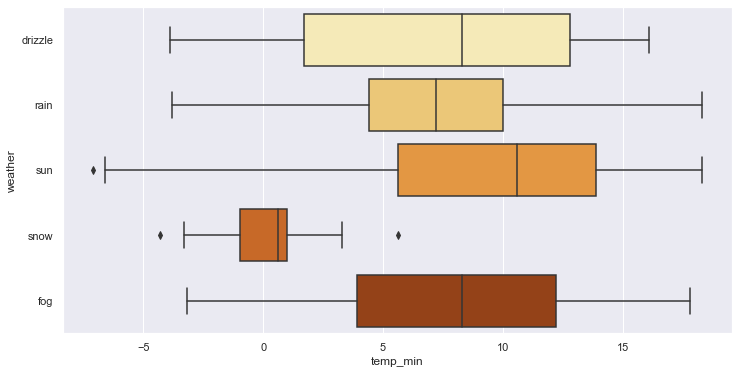

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot("temp_min","weather",data=weather,palette="YlOrBr")
plt.show()

### Heatmap

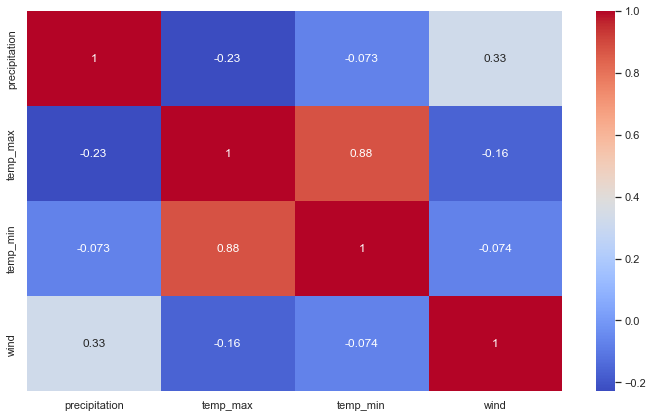

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(weather.corr(),annot=True,cmap='coolwarm')
plt.show()

### There is a positive correlation between temp_max and temp_min.

Pearson correlation: -0.22855481643297046
T Test and P value: Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


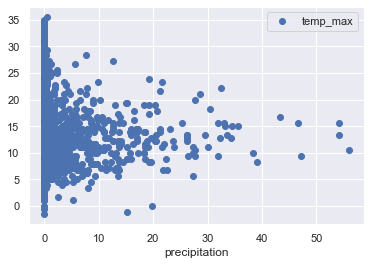

In [22]:
weather.plot("precipitation","temp_max",style='o') 
print("Pearson correlation:",weather["precipitation"].corr(weather["temp_max"]))
print("T Test and P value:",stats.ttest_ind(weather["precipitation"],weather["temp_max"]))

Pearson correlation: -0.16485663487495478
T Test and P value: Ttest_indResult(statistic=-67.3601643301846, pvalue=0.0)


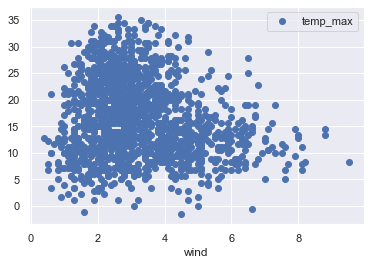

In [23]:
weather.plot("wind","temp_max",style='o') 
print("Pearson correlation:",weather["wind"].corr(weather["temp_max"]))
print("T Test and P value:",stats.ttest_ind(weather["wind"],weather["temp_max"]))

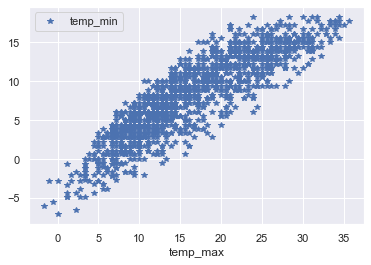

In [27]:
weather.plot("temp_max","temp_min",style='*')
plt.show()

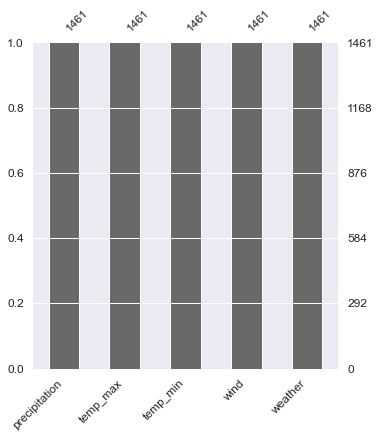

In [29]:
# Drop the date column
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(weather.drop(["date"],axis=1),ax=axz,fontsize=12);

In [30]:
# drop the date column
weather=weather.drop(["date"],axis=1)

In [34]:
# Remove the outlier
Q1=weather.quantile(0.25)
Q3=weather.quantile(0.75)
IQR=Q3-Q1
weather=weather[~((weather<(Q1-1.5*IQR))|(weather>(Q3+1.5*IQR))).any(axis=1)]

In [38]:
weather.head(15)

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
2,0.8,11.7,7.2,2.3,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
6,0.0,7.2,2.8,2.3,rain
7,0.0,10.0,2.8,2.0,sun
8,4.3,9.4,5.0,3.4,rain
9,1.0,6.1,0.6,3.4,rain
10,0.0,6.1,-1.1,5.1,sun
11,0.0,6.1,-1.7,1.9,sun


In [40]:
#label encoding 
weather.replace({'weather':{'drizzle':0,'rain':1,'sun':2,'snow':3,'fog':4}},inplace=True)
weather.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
2,0.8,11.7,7.2,2.3,1
4,1.3,8.9,2.8,6.1,1
5,2.5,4.4,2.2,2.2,1
6,0.0,7.2,2.8,2.3,1


In [41]:
#separting data and labels
X=weather.drop(columns='weather',axis=1)
y=weather['weather']
print(X)
print(y)

      precipitation  temp_max  temp_min  wind
0               0.0      12.8       5.0   4.7
2               0.8      11.7       7.2   2.3
4               1.3       8.9       2.8   6.1
5               2.5       4.4       2.2   2.2
6               0.0       7.2       2.8   2.3
...             ...       ...       ...   ...
1455            0.0       4.4       0.0   2.5
1457            1.5       5.0       1.7   1.3
1458            0.0       7.2       0.6   2.6
1459            0.0       5.6      -1.0   3.4
1460            0.0       5.6      -2.1   3.5

[1233 rows x 4 columns]
0       0
2       1
4       1
5       1
6       1
       ..
1455    2
1457    1
1458    4
1459    2
1460    2
Name: weather, Length: 1233, dtype: int64


In [42]:
#training and test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)
print("shape of X_train= ",X_train.shape)
print("shape of X_test= ",X_test.shape)
print("shape of y_train= ",y_train.shape)
print("shape of y_test= ",y_test.shape)

shape of X_train=  (986, 4)
shape of X_test=  (247, 4)
shape of y_train=  (986,)
shape of y_test=  (247,)


In [43]:
# Creating the Model
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [44]:
#model evalution
#Accuracy score
#accurcy of training data 
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8255578093306288


In [45]:
#accurcy of testing data 
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,y_test)
print('Accuracy on test data:',testing_data_accuracy)

Accuracy on test data: 0.8299595141700404


In [46]:
#Making a Predictive system
#changing the input _data to a numpy array
input_data1=(2.5,1.7,-2.8,5)
input_data_numpy_array1=np.asarray(input_data1)

In [47]:
#reshape the np array as we are predicting for one instance
input_data_reshaped1=input_data_numpy_array1.reshape(1,-1)
input_data_reshaped1

array([[ 2.5,  1.7, -2.8,  5. ]])

In [48]:
prediction=model.predict(input_data_reshaped1)
print(prediction)

[3]


In [49]:
print("The weather is:")
if(prediction==0):
    print("Drizzle")
elif(prediction==1):
    print("Fog")
elif(prediction==2):
    print("Rain")
elif(prediction==3):
    print("snow")
else:
    print("Sun")

The weather is:
snow


In [50]:
input_data2=(0,6.7,0.6,2.2)
input_data_numpy_array2=np.asarray(input_data2)

In [51]:
input_data_numpy_array2= input_data_numpy_array2.reshape(1,-1)

In [52]:
prediction=model.predict(input_data_numpy_array2)
print(prediction)

[2]


In [53]:
print("The weather is:")
if(prediction==0):
    print("Drizzle")
elif(prediction==1):
    print("Fog")
elif(prediction==2):
    print("Rain")
elif(prediction==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain
